In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Preprocessing

In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.shape

(1338, 7)

#### Handling Null values

In [5]:

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
nu=df.isnull().sum()
nu_v=nu[nu>0]
nu_v

Series([], dtype: int64)

#### Handling Duplicates value

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

#### Select Numerical and categorical columns

In [10]:

num_cols=df.dtypes[df.dtypes!=object].index
cat_cols=df.dtypes[df.dtypes==object].index
print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


#### EDA

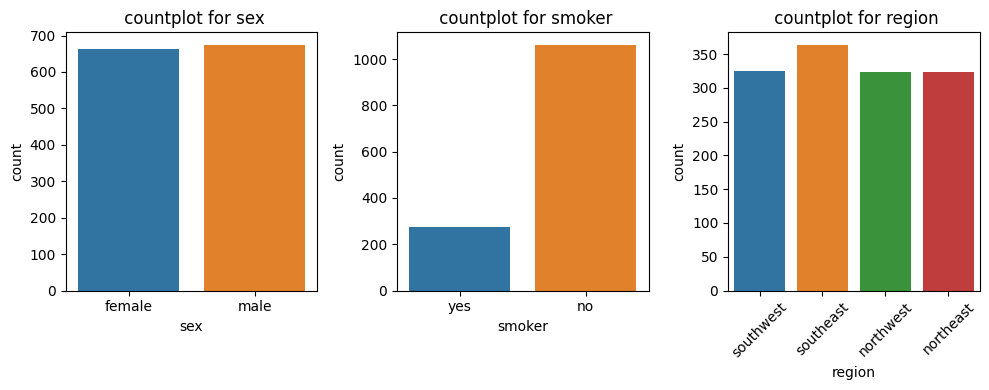

In [11]:
plt.figure(figsize=(10,4))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.title(f" countplot for { cat_cols[i]}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

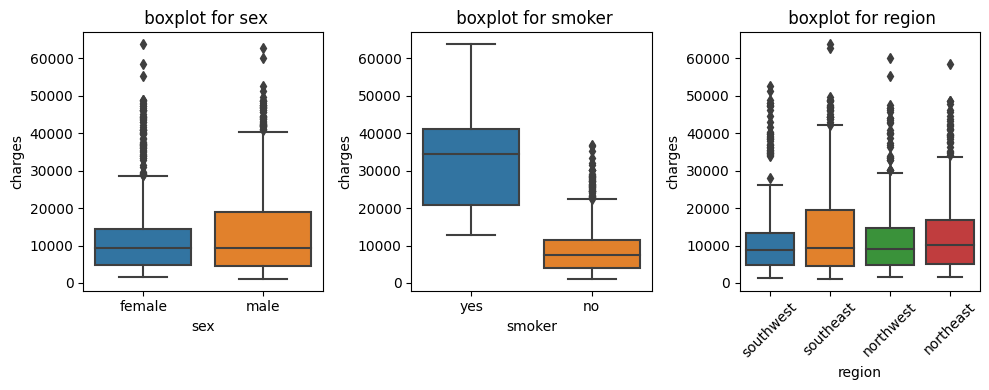

In [12]:
plt.figure(figsize=(10,4))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=df[cat_cols[i]],y=df['charges'])
    plt.title(f" boxplot for { cat_cols[i]}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

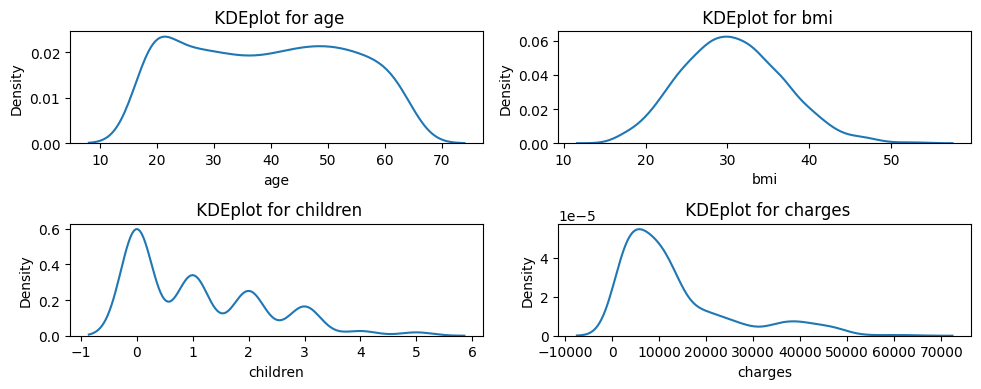

In [13]:
plt.figure(figsize=(10,4))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[num_cols[i]])
    plt.title(f" KDEplot for { num_cols[i]}")
plt.tight_layout()
plt.show()

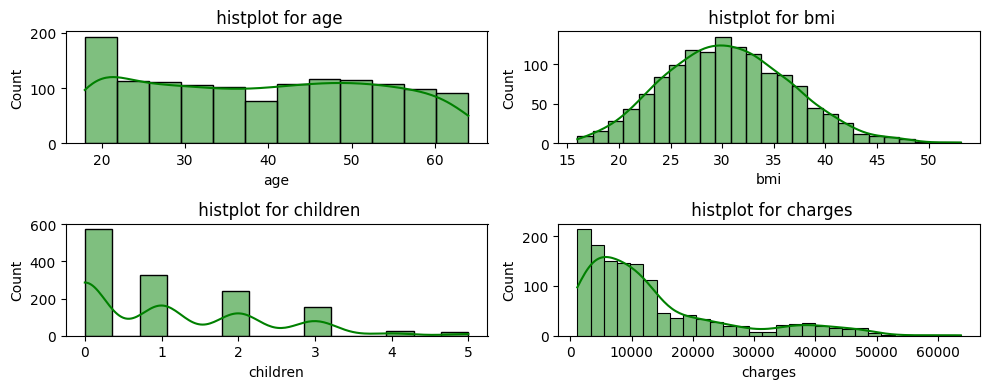

In [14]:
plt.figure(figsize=(10,4))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[num_cols[i]],kde=True,color='green')
    plt.title(f" histplot for { num_cols[i]}")
plt.tight_layout()
plt.show()

#### Correlation

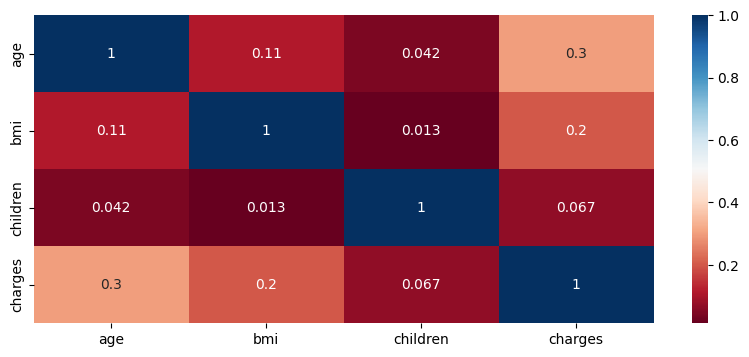

In [15]:
corr=df[num_cols].corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()


#### Outlier Analysis

In [16]:
a= df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a=a.iloc[:,3:]
a


,min,1%,2%,5%,50%,95%,98%,99%,max
age,18.0000,18.00000,18.0000,18.00000,39.0000,62.0000,63.000000,64.000000,64.00000
bmi,15.9600,17.89420,19.2692,21.24800,30.4000,41.1080,43.920800,46.411200,53.13000
children,0.0000,0.00000,0.0000,0.00000,1.0000,3.0000,4.000000,5.000000,5.00000
charges,1121.8739,1252.95744,1621.7308,1767.49292,9386.1613,41210.0498,46677.324238,48537.796878,63770.42801


In [17]:
df['children'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1337, dtype: int64>

In [18]:
print(df[df['charges']>46676.189821].shape)
print(df[df['charges']<1252.97273].shape)


(27, 7)
(14, 7)


In [19]:
df['charges']=np.where(df['charges']>46676.189821,46676,df['charges'])
df['charges']=np.where(df['charges']< 1252.97273,1252.97273,df['charges'])


#### Encoding categorical variable

In [20]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [21]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [22]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lb=LabelEncoder()
for i in ['sex','smoker']:
    df[i]=lb.fit_transform(df[i])

In [25]:
df['smoker'].value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

In [26]:
df_dum=pd.get_dummies(data=df,columns=['region'],drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(1337, 9)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


#### Select x and y

In [27]:
x=df_dum.drop('charges',axis=1)
y=df_dum['charges']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1002, 8)
(335, 8)
(1002,)
(335,)


#### Model Evaluations

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    res=pd.DataFrame({'Train_score':train_score,'Test_score':test_score,'MAE':mae,'MSE':mse,'RMSE':rmse},index=[mname])
    return res

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

#### Model Building

In [33]:
lr=LinearRegression()
lr_res=eval_model(lr,x_train,y_train,x_test,y_test,'Linear Regression')
lr_res

,Train_score,Test_score,MAE,MSE,RMSE
Linear Regression,0.734834,0.808636,3917.704066,3.074808e+07,5545.094702


In [34]:
rid=Ridge(alpha=7)
rid_res=eval_model(rid,x_train,y_train,x_test,y_test,'Ridge')
rid_res


,Train_score,Test_score,MAE,MSE,RMSE
Ridge,0.733738,0.802769,4028.522907,3.169067e+07,5629.446833


In [35]:
las=Lasso(alpha=7)
las_res=eval_model(las,x_train,y_train,x_test,y_test,'Lasso')
las_res


,Train_score,Test_score,MAE,MSE,RMSE
Lasso,0.734812,0.808162,3921.273376,3.082420e+07,5551.955041


In [36]:
dt=DecisionTreeRegressor(max_depth=7,min_samples_split=22,random_state=30)
dt_res=eval_model(dt,x_train,y_train,x_test,y_test,'Decision Tree')
dt_res


,Train_score,Test_score,MAE,MSE,RMSE
Decision Tree,0.888837,0.854613,2737.093416,2.336052e+07,4833.271848


In [37]:
rf=RandomForestRegressor(n_estimators=15,max_depth=7,min_samples_split=22)
rf_res=eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res


,Train_score,Test_score,MAE,MSE,RMSE
Random Forest,0.888801,0.888807,2428.323985,1.786634e+07,4226.859529


In [38]:
ada=AdaBoostRegressor(n_estimators=15,random_state=22)
ada_res=eval_model(ada,x_train,y_train,x_test,y_test,'AdaBoost')
ada_res


,Train_score,Test_score,MAE,MSE,RMSE
AdaBoost,0.80826,0.839934,4329.435781,2.571916e+07,5071.405779


In [39]:
knn=KNeighborsRegressor(n_neighbors=15)
knn_res=eval_model(knn,x_train,y_train,x_test,y_test,'knn')
knn_res

,Train_score,Test_score,MAE,MSE,RMSE
knn,0.24728,0.169833,8374.234803,1.333896e+08,11549.442607


In [40]:
mod_con=pd.concat([lr_res,rid_res,las_res,dt_res,rf_res,ada_res,knn_res])
mod_con

,Train_score,Test_score,MAE,MSE,RMSE
Linear Regression,0.734834,0.808636,3917.704066,3.074808e+07,5545.094702
Ridge,0.733738,0.802769,4028.522907,3.169067e+07,5629.446833
Lasso,0.734812,0.808162,3921.273376,3.082420e+07,5551.955041
Decision Tree,0.888837,0.854613,2737.093416,2.336052e+07,4833.271848
Random Forest,0.888801,0.888807,2428.323985,1.786634e+07,4226.859529
AdaBoost,0.808260,0.839934,4329.435781,2.571916e+07,5071.405779
knn,0.247280,0.169833,8374.234803,1.333896e+08,11549.442607


#### Model Selection
According to,
RMSE :Best_model(with min rmse) = RF_reg and DT_reg
Minimal overfitting : RF_reg


#### Save the Model

In [41]:
import pickle

In [42]:
pickle.dump(lr,open('Linear_Regressor1.pkl','wb'))
pickle.dump(dt,open('Decision_Tree1.pkl','wb'))
pickle.dump(rf,open('Random_Forest1.pkl','wb'))

In [43]:
df_dum.head(10)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
5,31,0,25.740,0,0,3756.62160,False,True,False
6,46,0,33.440,1,0,8240.58960,False,True,False
7,37,0,27.740,3,0,7281.50560,True,False,False
8,37,1,29.830,2,0,6406.41070,False,False,False
9,60,0,25.840,0,0,28923.13692,True,False,False


In [44]:
df_dum.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13202.810917
std,14.044333,0.500163,6.100468,1.205571,0.403806,11861.602716
min,18.000000,0.000000,15.960000,0.000000,0.000000,1252.972730
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,46676.000000
